In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sarcasm/reddit_test.jsonl
/kaggle/input/sarcasm/sarcasm_detection_shared_task_twitter_training.jsonl
/kaggle/input/sarcasm/twitter_test.jsonl
/kaggle/input/sarcasm/sarcasm_detection_shared_task_reddit_training.jsonl
/kaggle/input/sarcasm/Ben-Sarc_ Bengali Sarcasm Detection Corpus.xlsx
/kaggle/input/sarcasm/sarcasm_v2/RQ-sarc-notsarc.csv
/kaggle/input/sarcasm/sarcasm_v2/GEN-sarc-notsarc.csv
/kaggle/input/sarcasm/sarcasm_v2/HYP-sarc-notsarc.csv
/kaggle/input/sarcastic-comments-on-reddit/train-balanced-sarcasm.csv
/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json
/kaggle/input/personal-data/high_contrast.jpeg
/kaggle/input/personal-data/1694354392633.jpg
/kaggle/input/personal-data/Translation of banglaNewsData.xlsx
/kaggle/input/personal-data/hindu.csv
/kaggle/input/personal-data/political.txt
/kaggle/input/personal-data/BanglaBlendCleanedData.xlsx
/kaggle/input/personal-data/result31.csv
/kaggle/input/personal-data/low_contrast_cat.jpeg
/kaggle/input/person

In [4]:
df = pd.read_excel('/kaggle/input/sarcasm/Ben-Sarc_ Bengali Sarcasm Detection Corpus.xlsx')

df.head(3)

,id,Text,Polarity
0,0,শুধু মাত্র এই পোস্টে কমেন্ট করার জন্য বাড়ির এ...,1
1,2,সাথে আছে বুক ভরা চুল ।,1
2,4,ভাই মিথ্যা কথা বইলেন না আপনি ভিপিএন ইউজ করে পো...,1


In [5]:
df.rename(columns={"Text": "text"}, inplace=True)
df.rename(columns={"Polarity": "label"}, inplace=True)

df.head(3)

,id,text,label
0,0,শুধু মাত্র এই পোস্টে কমেন্ট করার জন্য বাড়ির এ...,1
1,2,সাথে আছে বুক ভরা চুল ।,1
2,4,ভাই মিথ্যা কথা বইলেন না আপনি ভিপিএন ইউজ করে পো...,1


In [6]:
df['rtext'] = df['text'].apply(lambda x: ' '.join(x.split()[::-1]))

In [7]:
ri = 2
df['text'][ri], df['label'][ri]

('ভাই মিথ্যা কথা বইলেন না আপনি ভিপিএন ইউজ করে পোস্ট দিয়েছেন এবং আপনি রঙিন দুনিয়া দেখছেন না । কারণ আপনার ফ্রেম রঙিন হলেও গ্লাসটা কিন্তু কালো । আমি কিন্তু রঙিন দুনিয়ার একজন রঙমিস্ত্রি তাই বিষয়টি এড়িয়ে যেতে পারলাম না ।',
 1)

In [8]:
df.label.value_counts()

label
1    12818
0    12818
Name: count, dtype: int64

In [9]:
df.shape

(25636, 4)

In [10]:
from sklearn.model_selection import train_test_split

# Assume 'df' is your DataFrame and 'label_column' is the column you want to stratify on
# df, _ = train_test_split(df, train_size=1000, stratify=df['label'], random_state=42)

In [11]:
print(df.shape)
df.head(3)

(25636, 4)


,id,text,label,rtext
0,0,শুধু মাত্র এই পোস্টে কমেন্ট করার জন্য বাড়ির এ...,1,ছিলাম বসে কিনে বি এম করে বিক্রি ঘোড়া পাড়া ডি...
1,2,সাথে আছে বুক ভরা চুল ।,1,। চুল ভরা বুক আছে সাথে
2,4,ভাই মিথ্যা কথা বইলেন না আপনি ভিপিএন ইউজ করে পো...,1,। না পারলাম যেতে এড়িয়ে বিষয়টি তাই রঙমিস্ত্রি এ...


In [12]:
import pandas as pd
import json

# Read the JSONL file
data_train = []
with open('/kaggle/input/sarcasm/sarcasm_detection_shared_task_reddit_training.jsonl', 'r') as f:
    for line in f:
        # Parse each line as JSON and append to list
        data_train.append(json.loads(line))
data_twitter_df = pd.DataFrame(data_train)
# Convert list of dictionaries to Data

In [13]:
data_twitter_df['label']=data_twitter_df['label'].map({'SARCASM':0,'NOT_SARCASM':1})
data_twitter_df=data_twitter_df.rename(columns={'context':'parent_comment','response':'comment'})

In [14]:
data_twitter_df.head(3)

,label,comment,parent_comment
0,0,"Yeah I mean there's only one gender anyways, w...",[LPT: If you're worried about hurting someone'...
1,0,"Sounds like you don't like science, you theist...",[Promotional images for some guy's Facebook pa...
2,0,"Ofc play them in try mode, Blizzard were so ge...",[My friends won't play Dota2; I won't play LoL...


In [15]:
data_twitter_df['comment']=data_twitter_df['comment'].astype(str)
data_twitter_df['parent_comment']=data_twitter_df['parent_comment'].astype(str)

In [16]:
import torch
from torch.utils.data import Dataset

class MultiFeatureDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.comment = dataframe['comment']
        self.parent=dataframe['parent_comment']
        self.labels = dataframe.label
        self.max_len = max_len

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        if index >= len(self.data):
            raise IndexError(f"Index {index} out of range")
        comment = str(self.comment.iloc[index])
        parent = str(self.parent.iloc[index])
        label = self.labels.iloc[index]


 
        comment_encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        parent_encoding = self.tokenizer.encode_plus(
            parent,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
        'input_ids1': parent_encoding['input_ids'].flatten(),
        'attention_mask1': parent_encoding['attention_mask'].flatten(),
        'input_ids2': comment_encoding['input_ids'].flatten(),
        'attention_mask2': comment_encoding['attention_mask'].flatten(),
        'labels': torch.tensor(label, dtype=torch.long)
    }


In [17]:
print(data_twitter_df.shape)
data_twitter_df.head(3)

(4400, 3)


,label,comment,parent_comment
0,0,"Yeah I mean there's only one gender anyways, w...",['LPT: If you\'re worried about hurting someon...
1,0,"Sounds like you don't like science, you theist...","[""Promotional images for some guy's Facebook p..."
2,0,"Ofc play them in try mode, Blizzard were so ge...","[""My friends won't play Dota2; I won't play Lo..."


In [18]:
# df.rename(columns={"Polarity": "label"}, inplace=True)
df.rename(columns={"text": "parent_comment"}, inplace=True)
df.rename(columns={"rtext": "comment"}, inplace=True)

df.head(3)

,id,parent_comment,label,comment
0,0,শুধু মাত্র এই পোস্টে কমেন্ট করার জন্য বাড়ির এ...,1,ছিলাম বসে কিনে বি এম করে বিক্রি ঘোড়া পাড়া ডি...
1,2,সাথে আছে বুক ভরা চুল ।,1,। চুল ভরা বুক আছে সাথে
2,4,ভাই মিথ্যা কথা বইলেন না আপনি ভিপিএন ইউজ করে পো...,1,। না পারলাম যেতে এড়িয়ে বিষয়টি তাই রঙমিস্ত্রি এ...


In [19]:
data_twitter_df = df.copy()

In [20]:
from sklearn.model_selection import train_test_split

train_df, eval_df = train_test_split(data_twitter_df, test_size=0.2, random_state=42, stratify=data_twitter_df['label'])

print(len(train_df), len(eval_df))

20508 5128


In [21]:
train_df.head(3)

,id,parent_comment,label,comment
24108,24487,আমার ভাই এবং বাবাকে নিয়ে নােয়াখালী সদর থানায...,0,। পারেনি দিতে সন্ধান কোন আমাকে তারা চাইলে সন্ধ...
16703,11100,যদি ডট বল করাতে চাও তবে আমাকে ডাকো সুনীল নারিন...,0,। পানি বোতল এক ভিতর মরুভুমির । ছেলে সোনার আমাদ...
9138,22963,কেউ অক্সিজেন না পেয়ে মরে আর কেউ বিয়ে করে মরে ।,1,। মরে করে বিয়ে কেউ আর মরে পেয়ে না অক্সিজেন কেউ


In [22]:
from transformers import AutoConfig, AutoModel, AutoTokenizer, logging
import torch
import torch.nn as nn

# Suppress unnecessary warnings
logging.set_verbosity_error()

class CustomEncoderLayer(nn.Module):
    def __init__(self, hidden_size, num_attention_heads, dropout_rate=0.3):
        super(CustomEncoderLayer, self).__init__()
        self.self_attention = nn.MultiheadAttention(hidden_size, num_attention_heads, dropout=dropout_rate)
        self.cross_attention = nn.MultiheadAttention(hidden_size, num_attention_heads, dropout=dropout_rate)
        self.feed_forward = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 4),
            nn.ReLU(),
            nn.Linear(hidden_size * 4, hidden_size)
        )
        self.layer_norm1 = nn.LayerNorm(hidden_size)
        self.layer_norm2 = nn.LayerNorm(hidden_size)
        self.layer_norm3 = nn.LayerNorm(hidden_size)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, y, x_mask, y_mask):
        # Self-attention on x
        temp1 = x
        self_attn_output, _ = self.self_attention(x, x, x)
        x = self.layer_norm1(temp1 + self.dropout(self_attn_output))
        
        # Cross-attention from x to y
        cross_attn_output, cross_attn_weights = self.cross_attention(x, y, y)
        x = self.layer_norm2(temp1 + self.dropout(cross_attn_output))
        
        # Feed forward
        ff_output = self.feed_forward(x)
        x = self.layer_norm3(temp1 + self.dropout(ff_output))
        
        return x, cross_attn_weights

class CustomDualBanglaBERTModel(nn.Module):
    def __init__(self, model_checkpoint, num_layers=6, hidden_size=768, num_attention_heads=8, dropout_rate=0.1):
        super(CustomDualBanglaBERTModel, self).__init__()
        
        # Load BanglaBERT Electra-based models
        self.bert1 = AutoModel.from_pretrained(model_checkpoint)
        self.bert2 = AutoModel.from_pretrained(model_checkpoint)
        
        # Custom encoder layers
        self.encoder_layers = nn.ModuleList([
            CustomEncoderLayer(hidden_size, num_attention_heads, dropout_rate)
            for _ in range(num_layers)
        ])
        
        # Classification head
        self.fc = nn.Linear(hidden_size * 2, 2)

    def forward(self, input_ids1, attention_mask1, input_ids2, attention_mask2):
        # Get embeddings from two BERT models
        output1 = self.bert1(input_ids=input_ids1, attention_mask=attention_mask1).last_hidden_state
        output2 = self.bert2(input_ids=input_ids2, attention_mask=attention_mask2).last_hidden_state
        
        # Attention masks for padding tokens
        x_mask = ~attention_mask1.bool()
        y_mask = ~attention_mask2.bool()
        
        # Apply encoder layers
        for layer in self.encoder_layers:
            output1, _ = layer(output1, output2, x_mask, y_mask)
            output2, cross_attn_weights = layer(output2, output1, y_mask, x_mask)
        
        # Pool the outputs from both models
        pooled_output1 = torch.mean(output1, dim=1)
        pooled_output2 = torch.mean(output2, dim=1)
        
        # Combine and classify
        combined = torch.cat((pooled_output1, pooled_output2), dim=1)
        return self.fc(combined)

In [23]:
# Example usage
model_checkpoint = 'csebuetnlp/banglabert'
model = CustomDualBanglaBERTModel(model_checkpoint=model_checkpoint)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
model.cuda()

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

CustomDualBanglaBERTModel(
  (bert1): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm(

In [24]:
# Calculate the total number of trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Each parameter takes 4 bytes (float32)
param_size_in_bytes = trainable_params * 4

# Convert to GB
param_size_in_gb = param_size_in_bytes / (1024**3)
print(f"Approximate Model Size in Memory: {param_size_in_gb:.2f} GB")

Approximate Model Size in Memory: 1.03 GB


In [ ]:
# import torch
# import torch.nn as nn
# from transformers import  BertConfig,AutoModel

# class CustomEncoderLayer(nn.Module):
#     def __init__(self, hidden_size, num_attention_heads, dropout_rate=0.1):
#         super(CustomEncoderLayer, self).__init__()
#         self.self_attention = nn.MultiheadAttention(hidden_size, num_attention_heads, dropout=dropout_rate)
#         self.cross_attention = nn.MultiheadAttention(hidden_size, num_attention_heads, dropout=dropout_rate)
#         self.feed_forward = nn.Sequential(
#             nn.Linear(hidden_size, hidden_size * 4),
#             nn.ReLU(),
#             nn.Linear(hidden_size * 4, hidden_size)
#         )
#         self.layer_norm1 = nn.LayerNorm(hidden_size)
#         self.layer_norm2 = nn.LayerNorm(hidden_size)
#         self.layer_norm3 = nn.LayerNorm(hidden_size)
#         self.dropout = nn.Dropout(dropout_rate)

#     def forward(self, x, y):
#         # Self-attention on x
#         e=x
#         self_attn_output, _ = self.self_attention(x, x, x)
#         x = self.layer_norm1(e + self.dropout(self_attn_output))
        
#         # Cross-attention from x to y
#         cross_attn_output, cross_attn_weights = self.cross_attention(x, y, y)
#         x = self.layer_norm2(e + self.dropout(cross_attn_output))
        
#         # Feed forward
#         ff_output = self.feed_forward(x)
#         x = self.layer_norm3(e + self.dropout(ff_output))
        
#         return x, cross_attn_weights

# class CustomDualBERTModel(nn.Module):
#     def __init__(self, num_layers=3, hidden_size=768, num_attention_heads=8, dropout_rate=0.1):
#         super(CustomDualBERTModel, self).__init__()
        
#         # Two BERT models: one for each input
#         self.bert1 = AutoModel.from_pretrained('bert-base-uncased')
#         self.bert2 = AutoModel.from_pretrained('bert-base-uncased')
        
#         self.encoder_layers = nn.ModuleList([
#             CustomEncoderLayer(hidden_size, num_attention_heads, dropout_rate)
#             for _ in range(num_layers)
#         ])
        
#         self.fc = nn.Linear(hidden_size * 2, 2)

#     def forward(self, input_ids1, attention_mask1, input_ids2, attention_mask2):
#         # Get BERT embeddings from two different models
#         output1 = self.bert1(input_ids=input_ids1, attention_mask=attention_mask1).last_hidden_state
#         output2 = self.bert2(input_ids=input_ids2, attention_mask=attention_mask2).last_hidden_state
        
#         # Create attention masks
#         x_mask = ~attention_mask1.bool()
#         y_mask = ~attention_mask2.bool()
        
#         # Apply custom encoder layers (self-attention and cross-attention)
#         for layer in self.encoder_layers:
#             output1, _ = layer(output1, output2)
#             output2, cross_attn_weights = layer(output2, output1)
#         # Pool the outputs from both BERTs
#         pooled_output1 = torch.mean(output1, dim=1)
#         pooled_output2 = torch.mean(output2, dim=1)
        
#         # Combine and classify
#         combined = torch.cat((pooled_output1, pooled_output2), dim=1)
#         return self.fc(combined)


In [25]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from transformers import BertTokenizer, AdamW,AutoModel,AutoTokenizer
from tqdm import tqdm  # Import tqdm for progress bars

# Hyperparameters
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 2
LEARNING_RATE = 2e-5

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Create data loaders
train_dataset = MultiFeatureDataset(train_df, tokenizer, MAX_LEN)
val_dataset = MultiFeatureDataset(eval_df, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Initialize the model

# Usage
# model = CustomDualBERTModel()
#model.load_state_dict(torch.load('dual_bert_classifier.pth'))


# Optimizer with weight decay
from transformers import AdamW, get_linear_schedule_with_warmup


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [26]:
# Custom function to save the model
def save_model(model, filepath, epoch, val_accuracy, best_val_accuracy):
    """
    Save the model if the current validation accuracy is higher than the best seen so far.
    """
    if val_accuracy > best_val_accuracy:
        torch.save(model.state_dict(), filepath)
        print(f"Model saved at epoch {epoch+1} with validation accuracy: {val_accuracy:.2f}%")
        return val_accuracy  # Update best validation accuracy
    return best_val_accuracy  # Keep the previous best validation accuracy

# Training loop with model saving
best_val_accuracy = 0.0  # Initialize the best validation accuracy
model_filepath = 'dual_bert_classifier_best.pth'

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Initialize the tqdm progress bar
    progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", leave=False)
    
    for batch_idx, batch in enumerate(progress_bar):
        text_input_ids1 = batch['input_ids1'].to(device)
        text_attention_mask1 = batch['attention_mask1'].to(device)
        text_input_ids2 = batch['input_ids2'].to(device)
        text_attention_mask2 = batch['attention_mask2'].to(device)
        labels = batch['labels'].to(device)
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(text_input_ids1, text_attention_mask1, text_input_ids2, text_attention_mask2)
        
        # Calculate loss
        loss = nn.CrossEntropyLoss()(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update running loss and accuracy
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
        avg_loss = running_loss / (batch_idx + 1)

        # Update the progress bar with the average loss
        progress_bar.set_postfix(avg_loss=avg_loss)

    # Optional: Print statistics at the end of each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct_train / total_train
    print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
    
    # Validation
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch+1}", leave=False):
            text_input_ids1 = batch['input_ids1'].to(device)
            text_attention_mask1 = batch['attention_mask1'].to(device)
            text_input_ids2 = batch['input_ids2'].to(device)
            text_attention_mask2 = batch['attention_mask2'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(text_input_ids1, text_attention_mask1, text_input_ids2, text_attention_mask2)
            val_loss += nn.CrossEntropyLoss()(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    print(f'Epoch {epoch+1}/{EPOCHS}, Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    # Save the model if validation accuracy improves
    best_val_accuracy = save_model(model, model_filepath, epoch, val_accuracy, best_val_accuracy)

Epoch [1/2], Loss: 0.5029, Accuracy: 0.7575


Epoch 1/2, Validation Loss: 0.4325, Validation Accuracy: 80.19%
Model saved at epoch 1 with validation accuracy: 80.19%


Epoch [2/2], Loss: 0.3256, Accuracy: 0.8654


Epoch 2/2, Validation Loss: 0.5261, Validation Accuracy: 78.80%


In [30]:
# Define the model checkpoint and path to the saved weights
model_checkpoint = 'csebuetnlp/banglabert'
saved_model_path = 'dual_bert_classifier_best.pth'

# Recreate the model architecture
model = CustomDualBanglaBERTModel(model_checkpoint=model_checkpoint)

# Load the model weights from the saved file
model.load_state_dict(torch.load(saved_model_path))

# Send the model to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Custom model loaded successfully!")

<ipython-input-30-699ca1464688>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(saved_model_path))


Custom model loaded successfully!


Class 0:
  Precision: 0.8106
  Recall:    0.7878
  F1 Score:  0.7991
Class 1:
  Precision: 0.7936
  Recall:    0.8159
  F1 Score:  0.8046

Average Precision: 0.8021
Average Recall:    0.8019
Average F1 Score:  0.8018
Accuracy: 0.8019
Class Distribution: {0: 2564, 1: 2564}
Total Samples: 5128


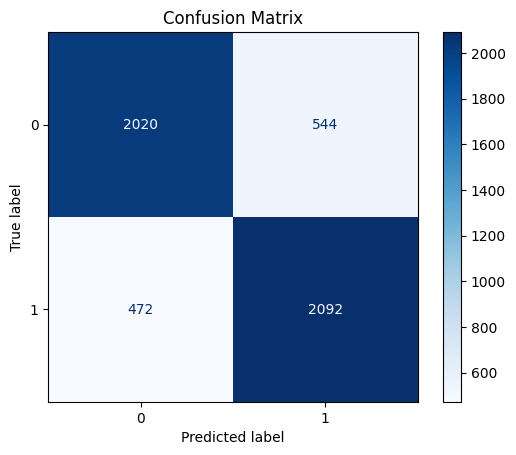

In [32]:

from tqdm import tqdm

def batch_predict(loader):
    model.eval()  # Set the model to evaluation mode
    predictions = []

    with torch.no_grad():
        for batch in tqdm(loader, desc="Batch Prediction", leave=False):
            text_input_ids1 = batch['input_ids1'].to(device)
            text_attention_mask1 = batch['attention_mask1'].to(device)
            text_input_ids2 = batch['input_ids2'].to(device)
            text_attention_mask2 = batch['attention_mask2'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(text_input_ids1, text_attention_mask1, text_input_ids2, text_attention_mask2)
            _, predicted = torch.max(outputs.data, 1)
            predictions.extend(predicted.cpu().numpy())

    return predictions
pred=batch_predict(val_loader)
true=val_dataset.labels

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
from sklearn.preprocessing import label_binarize


# Generate predictions and true labels

pred = np.array(pred)
true_labels =np.array(true)



# Calculate precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred, average=None)

# Get the unique labels
labels =np.array([0,1])

# Print the precision, recall, and F1 score for each class
for i, label in enumerate(labels):
    print(f"Class {label}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall:    {recall[i]:.4f}")
    print(f"  F1 Score:  {f1[i]:.4f}")

# Optionally, you can calculate the average scores
avg_precision, avg_recall, avg_f1, _ = precision_recall_fscore_support(true_labels, pred, average='weighted')

print(f"\nAverage Precision: {avg_precision:.4f}")
print(f"Average Recall:    {avg_recall:.4f}")
print(f"Average F1 Score:  {avg_f1:.4f}")

# Compute accuracy
accuracy = accuracy_score(true_labels, pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the number of samples for each class and total samples
unique, counts = np.unique(true_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))
total_samples = len(true_labels)
print(f'Class Distribution: {class_distribution}')
print(f'Total Samples: {total_samples}')

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
eval_df.head(3)

In [ ]:
# def preprocess_function(context,text):
#     parent_encoding = tokenizer(context, padding="max_length", truncation=True, max_length=128)
#     text_encoding = tokenizer(context, padding="max_length", truncation=True, max_length=128)
    
#     return {
#         'input_ids1': parent_encoding['input_ids'],
#         'attention_mask1': parent_encoding['attention_mask'],
#         'input_ids2': text_encoding['input_ids'],
#         'attention_mask2': text_encoding['attention_mask'],
#     }

In [ ]:
#batch=preprocess_function(data2.iloc[1011]['parent_comment'],data2.iloc[1011]['comment'])

In [ ]:
# with torch.no_grad():
#     text_input_ids1 = torch.tensor(batch['input_ids1']).unsqueeze(dim=0).to(device)
#     text_attention_mask1 = torch.tensor(batch['attention_mask1']).unsqueeze(dim=0).to(device)
#     text_input_ids2 =torch.tensor(batch['input_ids2']).unsqueeze(dim=0).to(device)
#     text_attention_mask2 = torch.tensor(batch['attention_mask2']).unsqueeze(dim=0).to(device)
    
#     outputs = model(text_input_ids1, text_attention_mask1, text_input_ids2, text_attention_mask2).squeeze()
#     print(np.argmax(outputs.cpu()))
#     print(outputs)

# Using Concatenation Technique

In [ ]:
data_twitter_df.head(3)

In [ ]:
# def concat_function(comment, parent):
#     return comment + " " + parent

# data_twitter_df['text'] = data_twitter_df.apply(lambda x: concat_function(x['comment'], x['parent_comment']), axis=1)

In [ ]:
data_twitter_df.head(2)

In [ ]:
data_twitter_df_concat=data_twitter_df[['parent_comment','label']]
data_twitter_df_concat

In [ ]:
train_df, eval_df = train_test_split(data_twitter_df_concat, test_size=0.2, random_state=42, stratify=data_twitter_df_concat['label'])


train_df.head(3)

In [ ]:
train_df.label.value_counts()

In [ ]:
eval_df.label.value_counts()

In [ ]:
model_checkpoint

In [ ]:
tokenizer

In [ ]:
# Print the original sentence.
dem = 'আমি তোমাকে ভালবাসি।'
print(' Original: ', dem)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(dem))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(dem)))

In [ ]:
from transformers import AutoTokenizer,BertForSequenceClassification, Trainer, TrainingArguments,BertConfig
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer
# train_df=augment_text(train_df)
# print('augmentation finished..')
# # Convert the pandas DataFrames to Hugging Face Datasets.
train_dataset = Dataset.from_pandas(train_df)

eval_dataset = Dataset.from_pandas(eval_df)

# Create a DatasetDict to hold the training and evaluation datasets.
dataset_dict = DatasetDict({
    'train': train_dataset,
    'eval': eval_dataset
})

# Specify the checkpoint of the pre-trained model to use for tokenization.
# model_checkpoint ='bert-base-uncased'

# Load the tokenizer from the specified checkpoint.
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

# Define a function to tokenize the input examples.
def tokenize_function(examples):
    return tokenizer(examples['parent_comment'], truncation=True)

# Apply the tokenization function to the datasets.
# This tokenizes the 'text' field in each example, with batched processing for efficiency.
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

In [ ]:
from transformers import BertForSequenceClassification,AutoModelForSequenceClassification, TrainingArguments, Trainer, BertConfig, DataCollatorWithPadding
from sklearn.metrics import accuracy_score
# model_checkpoint='bert-base-uncased'

def compute_metrics(p):
    logits, labels = p
    predictions = logits.argmax(axis=-1)  # Get the predicted class
    accuracy = accuracy_score(labels, predictions)
    return {"accuracy": accuracy}
# Load the configuration for BERT model from a pretrained model directory.
# Adjust the dropout probabilities and specify the number of output labels.
#model_config = BertConfig.from_pretrained(model_checkpoint, hidden_dropout_prob=0.40,  attention_probs_dropout_prob=0.15, num_labels=2)

# Load the BERT model for sequence classification from a pretrained model directory.
# The model is trained on a specific dataset relevant to the task.
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)

model

In [ ]:


# Create a data collator that dynamically pads the inputs to the longest sequence in a batch.
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Define the training arguments for the Trainer with no model saving.
training_args = TrainingArguments(
    output_dir="./results",              # Directory to save training logs (if any).
    evaluation_strategy="epoch",         # Evaluate the model at the end of each epoch.
    save_strategy="no",                  # Do not save the model during or after training.
    learning_rate=2e-5,                  # Learning rate for the optimizer.
    per_device_train_batch_size=8,      # Batch size for training.
    per_device_eval_batch_size=8,       # Batch size for evaluation.
    num_train_epochs=4,                  # Number of epochs to train the model.
    weight_decay=0.01,                   # Weight decay to apply (if any).
    load_best_model_at_end=False,        # Do not load the best model at the end of training.
    report_to="none"                     # Disable logging to W&B.
)

# Initialize the Trainer with the model, training arguments, datasets, tokenizer, and data collator.
trainer = Trainer(
    model=model,                          # The model to train.
    args=training_args,                   # Training arguments.
    train_dataset=tokenized_datasets['train'],  # Training dataset.
    eval_dataset=tokenized_datasets['eval'],    # Evaluation dataset.
    tokenizer=tokenizer,                  # Tokenizer used for preprocessing.
    data_collator=data_collator,          # Data collator for dynamic padding.
    compute_metrics=compute_metrics       # Compute accuracy metric.
)

# Start the training process.
trainer.train()


In [ ]:
model

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Generate predictions and true labels
predictions = trainer.predict(tokenized_datasets['eval'])
preds = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids



# Calculate precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, preds, average=None)

# Get the unique labels
labels = np.unique(true_labels)

# Print the precision, recall, and F1 score for each class
for i, label in enumerate(labels):
    print(f"Class {label}:")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall:    {recall[i]:.2f}")
    print(f"  F1 Score:  {f1[i]:.2f}")

# Optionally, you can calculate the average scores
avg_precision, avg_recall, avg_f1, _ = precision_recall_fscore_support(true_labels, preds, average='weighted')

print(f"\nAverage Precision: {avg_precision:.2f}")
print(f"Average Recall:    {avg_recall:.2f}")
print(f"Average F1 Score:  {avg_f1:.2f}")

# Compute accuracy
accuracy = accuracy_score(true_labels, preds)
print(f'Accuracy: {accuracy:.2f}')

# Print the number of samples for each class and total samples
unique, counts = np.unique(true_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))
total_samples = len(true_labels)
print(f'Class Distribution: {class_distribution}')
print(f'Total Samples: {total_samples}')

# Compute confusion matrix
cm = confusion_matrix(true_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.config.id2label)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = model.config.num_labels

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels, predictions.predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['darkorange', 'blue', 'green', 'red']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
eval_df.reset_index(drop=True, inplace=True)

In [ ]:
eval_df.head(10)

In [ ]:
text = eval_df['parent_comment'][7]
text

In [ ]:
def predict(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    
    # Move inputs to the same device as the model (GPU or CPU)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    
    # Make predictions
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    
    # Get the predicted class (0 or 1)
    predicted_class = torch.argmax(logits, dim=-1).item()

    return predicted_class

predict(text)

In [ ]:
preds[:10]

In [ ]:
true_labels[:10]

# Semiase Architecture

In [ ]:
import torch
from torch.utils.data import Dataset

class MultiFeatureDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.comment = dataframe['comment']
        self.parent=dataframe['parent_comment']
        self.labels = dataframe.label
        self.max_len = max_len

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        if index >= len(self.data):
            raise IndexError(f"Index {index} out of range")
        comment = str(self.comment.iloc[index])
        parent = str(self.parent.iloc[index])
        label = self.labels.iloc[index]


 
        comment_encoding = self.tokenizer.encode_plus(
            comment,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        parent_encoding = self.tokenizer.encode_plus(
            parent,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
        'input_ids1': parent_encoding['input_ids'].flatten(),
        'attention_mask1': parent_encoding['attention_mask'].flatten(),
        'input_ids2': comment_encoding['input_ids'].flatten(),
        'attention_mask2': comment_encoding['attention_mask'].flatten(),
        'labels': torch.tensor(label, dtype=torch.long)
    }


In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel

class SemiaseBERT(nn.Module):
    def __init__(self, hidden_size=768):
        super(SemiaseBERT, self).__init__()
        
        # Two BERT models: one for each input
        self.bert1 = AutoModel.from_pretrained('bert-base-uncased')
        self.bert2 = AutoModel.from_pretrained('bert-base-uncased')
        
        # Fully connected layer for classification
        self.fc = nn.Linear(hidden_size * 2, 2)  # Multiply by 2 for concatenation

    def forward(self, input_ids1, attention_mask1, input_ids2, attention_mask2):
        # Get BERT embeddings (pooled output or CLS token output)
        output1 = self.bert1(input_ids=input_ids1, attention_mask=attention_mask1).pooler_output  # [batch_size, hidden_size]
        output2 = self.bert2(input_ids=input_ids2, attention_mask=attention_mask2).pooler_output  # [batch_size, hidden_size]
        
        # Concatenate the pooled outputs
        combined = torch.cat((output1, output2), dim=1)  # [batch_size, hidden_size * 2]
        
        # Pass through the fully connected layer
        return self.fc(combined)  # [batch_size, 2]



In [ ]:
data_twitter_df.head(3)

In [ ]:
# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader
# from transformers import BertTokenizer, AdamW,AutoModel,AutoTokenizer
# from tqdm import tqdm  # Import tqdm for progress bars

# # Hyperparameters
# MAX_LEN = 128
# BATCH_SIZE = 16
# EPOCHS = 5
# LEARNING_RATE = 2e-5

# tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
# train_df, eval_df = train_test_split(data_twitter_df, test_size=0.2, random_state=42, stratify=data_twitter_df['label'])
# # Create data loaders
# train_dataset = MultiFeatureDataset(train_df, tokenizer, MAX_LEN)
# val_dataset = MultiFeatureDataset(eval_df, tokenizer, MAX_LEN)

# train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# # Initialize the model

# # Usage
# model = SemiaseBERT()
# #model.load_state_dict(torch.load('dual_bert_classifier.pth'))


# # Optimizer with weight decay
# from transformers import AdamW, get_linear_schedule_with_warmup


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = model.to(device)

# optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)


# model.cuda()

In [ ]:

# # Training loop
# for epoch in range(EPOCHS):
#     model.train()
#     running_loss = 0.0
#     correct_train = 0
#     total_train = 0
    
#     # Initialize the tqdm progress bar
#     progress_bar = tqdm(train_loader, desc=f"Training Epoch {epoch+1}", leave=False)
    
#     for batch_idx,batch in enumerate(progress_bar):
#         text_input_ids1 = batch['input_ids1'].to(device)
#         text_attention_mask1 = batch['attention_mask1'].to(device)
#         text_input_ids2 = batch['input_ids2'].to(device)
#         text_attention_mask2 = batch['attention_mask2'].to(device)
#         labels = batch['labels'].to(device)
        
#         optimizer.zero_grad()
        
#         # Forward pass
#         outputs = model(text_input_ids1, text_attention_mask1, text_input_ids2, text_attention_mask2)
        
#         # Calculate loss
#         loss = nn.CrossEntropyLoss()(outputs, labels)
        
#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
        
#         # Update running loss and accuracy
#         running_loss += loss.item()
#         _, predicted = torch.max(outputs.data, 1)
#         total_train += labels.size(0)
#         correct_train += (predicted == labels).sum().item()
        
#         avg_loss = running_loss / (batch_idx + 1)

#         # Update the progress bar with the average loss
#         progress_bar.set_postfix(avg_loss=avg_loss)

#     # Optional: Print statistics at the end of each epoch
#     epoch_loss = running_loss / len(train_loader)
#     epoch_acc = correct_train / total_train
#     print(f"Epoch [{epoch+1}/{EPOCHS}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
#     # Validation
#     model.eval()
#     val_loss = 0
#     correct_val = 0
#     total_val = 0
#     with torch.no_grad():
#         for batch in tqdm(val_loader, desc=f"Validation Epoch {epoch+1}", leave=False):
#             text_input_ids1 = batch['input_ids1'].to(device)
#             text_attention_mask1 = batch['attention_mask1'].to(device)
#             text_input_ids2 = batch['input_ids2'].to(device)
#             text_attention_mask2 = batch['attention_mask2'].to(device)
#             labels = batch['labels'].to(device)
            
    
#             outputs = model(text_input_ids1, text_attention_mask1, text_input_ids2, text_attention_mask2)
#             val_loss += nn.CrossEntropyLoss()(outputs, labels).item()
#             _, predicted = torch.max(outputs.data, 1)
#             total_val += labels.size(0)
#             correct_val += (predicted == labels).sum().item()

#     val_accuracy = 100 * correct_val / total_val
#     print(f'Epoch {epoch+1}/{EPOCHS}, Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%')

# # Save the model
# torch.save(model.state_dict(), 'dual_bert_classifier2.pth')


In [ ]:

# from tqdm import tqdm

# def batch_predict(loader):
#     model.eval()  # Set the model to evaluation mode
#     predictions = []

#     with torch.no_grad():
#         for batch in tqdm(loader, desc="Batch Prediction", leave=False):
#             text_input_ids1 = batch['input_ids1'].to(device)
#             text_attention_mask1 = batch['attention_mask1'].to(device)
#             text_input_ids2 = batch['input_ids2'].to(device)
#             text_attention_mask2 = batch['attention_mask2'].to(device)
#             labels = batch['labels'].to(device)
#             outputs = model(text_input_ids1, text_attention_mask1, text_input_ids2, text_attention_mask2)
#             _, predicted = torch.max(outputs.data, 1)
#             predictions.extend(predicted.cpu().numpy())

#     return predictions
# pred=batch_predict(val_loader)
# true=val_dataset.labels

# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
# import numpy as np
# from sklearn.metrics import precision_recall_fscore_support
# import numpy as np
# from sklearn.preprocessing import label_binarize


# # Generate predictions and true labels

# pred = np.array(pred)
# true_labels =np.array(true)



# # Calculate precision, recall, and F1 score for each class
# precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred, average=None)

# # Get the unique labels
# labels =np.array([0,1])

# # Print the precision, recall, and F1 score for each class
# for i, label in enumerate(labels):
#     print(f"Class {label}:")
#     print(f"  Precision: {precision[i]:.2f}")
#     print(f"  Recall:    {recall[i]:.2f}")
#     print(f"  F1 Score:  {f1[i]:.2f}")

# # Optionally, you can calculate the average scores
# avg_precision, avg_recall, avg_f1, _ = precision_recall_fscore_support(true_labels, pred, average='weighted')

# print(f"\nAverage Precision: {avg_precision:.2f}")
# print(f"Average Recall:    {avg_recall:.2f}")
# print(f"Average F1 Score:  {avg_f1:.2f}")

# # Compute accuracy
# accuracy = accuracy_score(true_labels, pred)
# print(f'Accuracy: {accuracy:.2f}')

# # Print the number of samples for each class and total samples
# unique, counts = np.unique(true_labels, return_counts=True)
# class_distribution = dict(zip(unique, counts))
# total_samples = len(true_labels)
# print(f'Class Distribution: {class_distribution}')
# print(f'Total Samples: {total_samples}')

# # Compute confusion matrix
# cm = confusion_matrix(true_labels, pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# # Plot confusion matrix
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.show()